In [1]:
#DATA LOAD FOR C CODE
#change with your path containing results from python and from the quantized net
fc = open("c_res_total.txt","r")
fp = open("python_res_total.txt","r")

#avg_err = [[], [], [], []]
max_err_C = [[], [], [], []]
ch = [[], [], [], []]
for i in range(169):
    for j in range(250*64):
        c_output =  [float(n) for n in fc.readline().split()]
        python_output = [float(n) for n in fp.readline().split()]

        ch[0].append(abs(c_output[0]-python_output[0]))
        ch[1].append(abs(c_output[1]-python_output[1]))
        ch[2].append(abs(c_output[2]-python_output[2]))
        ch[3].append(abs(c_output[3]-python_output[3]))

    """     
    avg_err[0].append(sum(ch[0])/(64*250))
    avg_err[1].append(sum(ch[1])/(64*250))
    avg_err[2].append(sum(ch[2])/(64*250))
    avg_err[3].append(sum(ch[3])/(64*250)) 
    """

    max_err_C[0].append(max(ch[0]))
    max_err_C[1].append(max(ch[1]))
    max_err_C[2].append(max(ch[2]))
    max_err_C[3].append(max(ch[3]))

    ch[0].clear()
    ch[1].clear()
    ch[2].clear()
    ch[3].clear()

fp.close()
fc.close()

In [2]:
#DATA LOAD FOR CUDA CODE
#change with your path containing results from python and from the quantized net
fc = open("cuda_res.txt","r")
fp = open("python_res_total.txt","r")

#avg_err = [[], [], [], []]
max_err_cuda = [[], [], [], []]
ch = [[], [], [], []]
for i in range(169):
    for j in range(250*64):
        c_output =  [float(n) for n in fc.readline().split()]
        python_output = [float(n) for n in fp.readline().split()]

        ch[0].append(abs(c_output[0]-python_output[0]))
        ch[1].append(abs(c_output[1]-python_output[1]))
        ch[2].append(abs(c_output[2]-python_output[2]))
        ch[3].append(abs(c_output[3]-python_output[3]))

    """     
    avg_err[0].append(sum(ch[0])/(64*250))
    avg_err[1].append(sum(ch[1])/(64*250))
    avg_err[2].append(sum(ch[2])/(64*250))
    avg_err[3].append(sum(ch[3])/(64*250)) 
    """

    max_err_cuda[0].append(max(ch[0]))
    max_err_cuda[1].append(max(ch[1]))
    max_err_cuda[2].append(max(ch[2]))
    max_err_cuda[3].append(max(ch[3]))

    ch[0].clear()
    ch[1].clear()
    ch[2].clear()
    ch[3].clear()

fp.close()
fc.close()

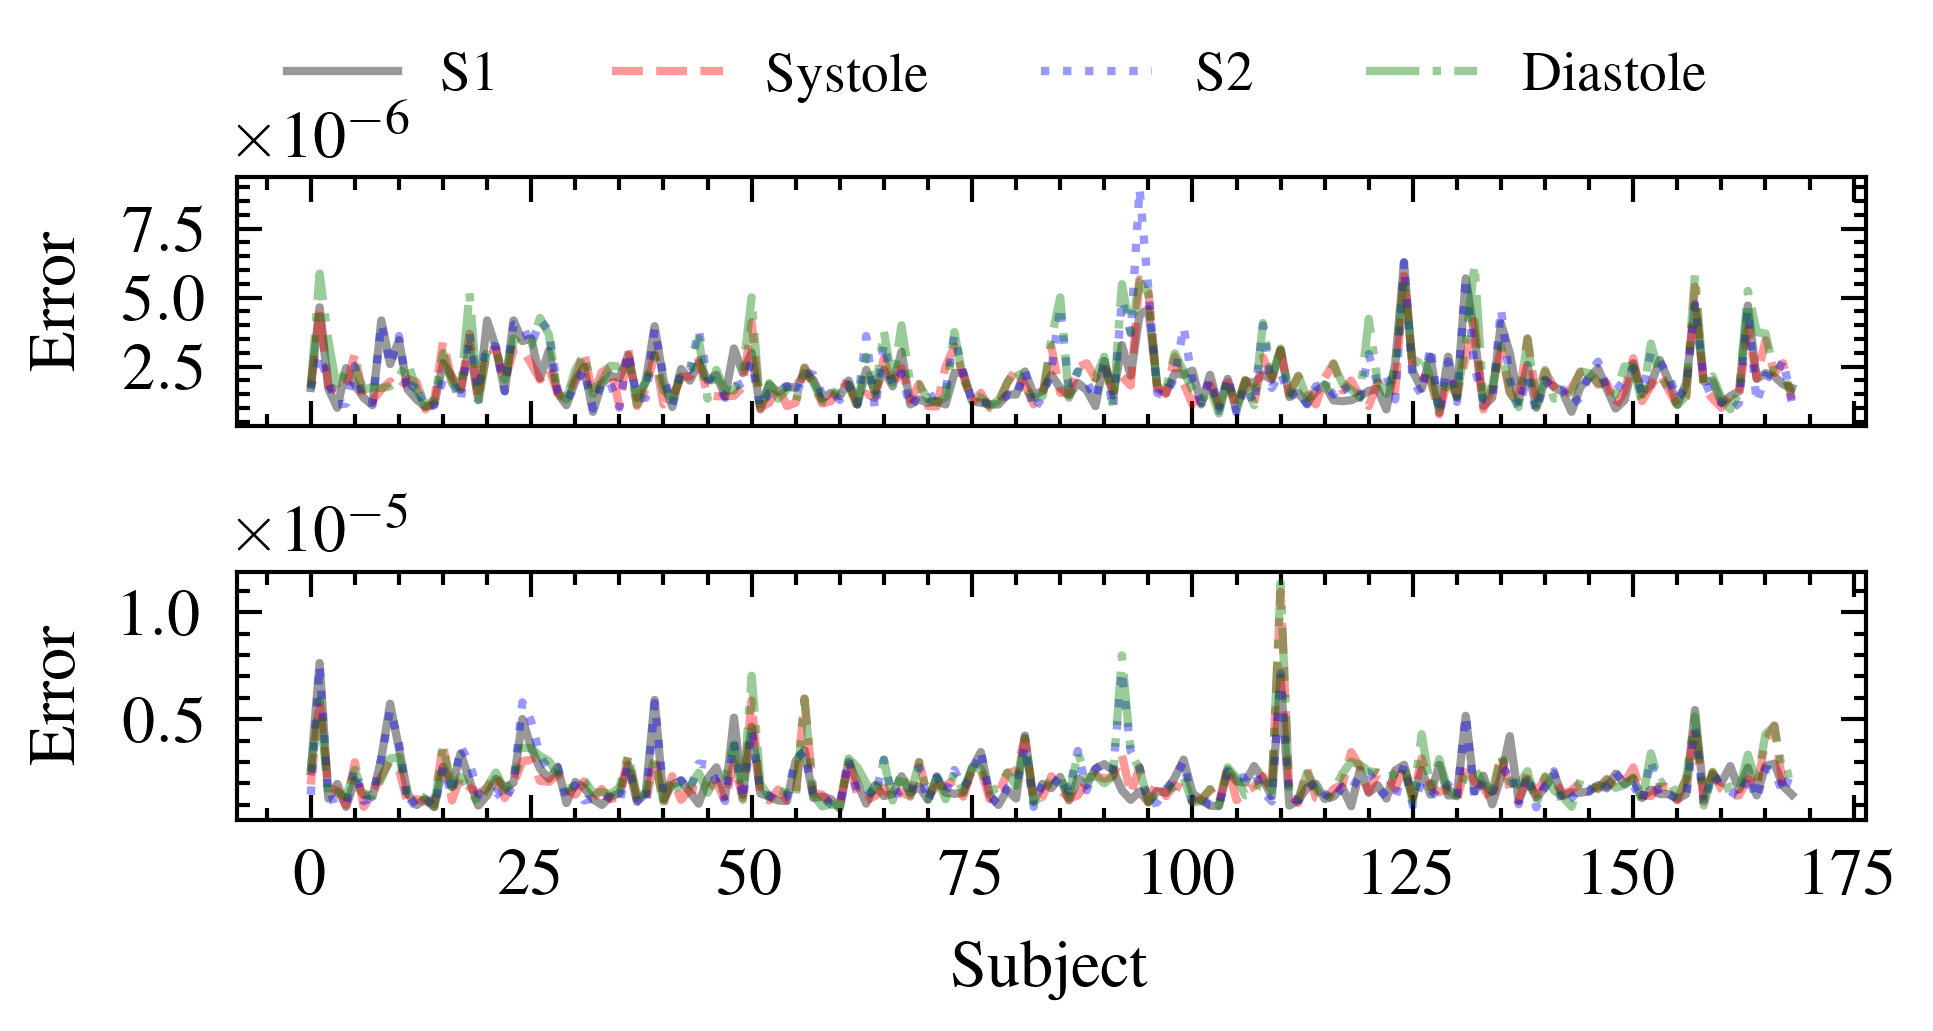

In [14]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','ieee'])

labels = ['S1','Systole',"S2","Diastole"]

fig, axs = plt.subplots(2, 1)
#set fig height
fig.set_figheight(1.75)
#axs[0].set_title(f'Max error for C implementation')
for i in range(4):
    axs[0].plot(max_err_C[i], alpha=0.4, label=labels[i])
    axs[1].plot(max_err_cuda[i], alpha=0.4, label=labels[i])
    #axs[0].set_xlabel('Subject\n\n(a) Max error for C implementation')
axs[0].set_ylabel('Error')
#axs[0].grid()
#remove values on x-axis
#axs[0].set_xticks([])
#axs[0].legend(loc="upper left", fontsize='xx-small',ncols=4)
#axs[1].set_title(f'Max error for CUDA implementation')
axs[1].set_xlabel('Subject')
axs[1].set_ylabel('Error')
#axs[1].grid()
#axs[1].legend(loc="upper left", fontsize='xx-small', ncols=4)
axs[0].legend(bbox_to_anchor=(0,1.1, 1,0.2), fontsize='small', ncols=4)
#axs[1].legend(bbox_to_anchor=(1.04, 1), fontsize='small')
#fig.suptitle('Max error in each patient', fontsize=16)
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.tight_layout()
#plt.gcf().set_dpi(600)
plt.savefig("cudac.png", format="png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
""" #change with your path containing results from python and from the quantized net
fc = open("cuda_res.txt","r")
fp = open("python_res_total.txt","r")

avg_err = [[], [], [], []]
max_err = [[], [], [], []]
ch = [[], [], [], []]
for i in range(169):
    for j in range(250*64):
        c_output =  [float(n) for n in fc.readline().split()]
        python_output = [float(n) for n in fp.readline().split()]

        ch[0].append(abs(c_output[0]-python_output[0]))
        ch[1].append(abs(c_output[1]-python_output[1]))
        ch[2].append(abs(c_output[2]-python_output[2]))
        ch[3].append(abs(c_output[3]-python_output[3]))

    avg_err[0].append(sum(ch[0])/(64*250))
    avg_err[1].append(sum(ch[1])/(64*250))
    avg_err[2].append(sum(ch[2])/(64*250))
    avg_err[3].append(sum(ch[3])/(64*250))

    max_err[0].append(max(ch[0]))
    max_err[1].append(max(ch[1]))
    max_err[2].append(max(ch[2]))
    max_err[3].append(max(ch[3]))

    ch[0].clear()
    ch[1].clear()
    ch[2].clear()
    ch[3].clear()

fp.close()
fc.close()

fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i in range(4):
    axs[i].plot(avg_err[i], c='blue', alpha=0.4)
    axs[i].set_title(f'Channel {i}')
    axs[i].set_xlabel('Patient set')
    axs[i].set_ylabel('avg. error')
    axs[i].grid()
fig.suptitle('Avg. error in each patient', fontsize=16)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i in range(4):
    axs[i].plot(max_err[i], c='blue', alpha=0.4)
    axs[i].set_title(f'Channel {i}')
    axs[i].set_xlabel('Patient set')
    axs[i].set_ylabel('max error')
    axs[i].grid()
fig.suptitle('Max error in each patient', fontsize=16)
plt.tight_layout()
plt.show() """

' #change with your path containing results from python and from the quantized net\nfc = open("cuda_res.txt","r")\nfp = open("python_res_total.txt","r")\n\navg_err = [[], [], [], []]\nmax_err = [[], [], [], []]\nch = [[], [], [], []]\nfor i in range(169):\n    for j in range(250*64):\n        c_output =  [float(n) for n in fc.readline().split()]\n        python_output = [float(n) for n in fp.readline().split()]\n\n        ch[0].append(abs(c_output[0]-python_output[0]))\n        ch[1].append(abs(c_output[1]-python_output[1]))\n        ch[2].append(abs(c_output[2]-python_output[2]))\n        ch[3].append(abs(c_output[3]-python_output[3]))\n\n    avg_err[0].append(sum(ch[0])/(64*250))\n    avg_err[1].append(sum(ch[1])/(64*250))\n    avg_err[2].append(sum(ch[2])/(64*250))\n    avg_err[3].append(sum(ch[3])/(64*250))\n\n    max_err[0].append(max(ch[0]))\n    max_err[1].append(max(ch[1]))\n    max_err[2].append(max(ch[2]))\n    max_err[3].append(max(ch[3]))\n\n    ch[0].clear()\n    ch[1].cle